Mounted at /content/drive


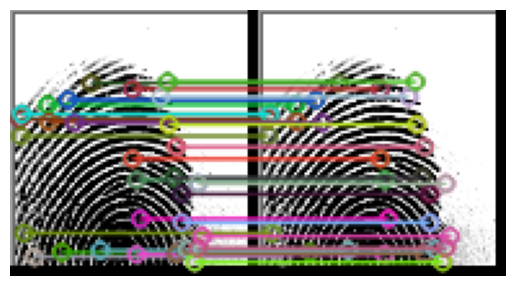

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from google.colab import drive
drive.mount('/content/drive')

# Reading the reference image
img1 = cv2.imread('/content/drive/MyDrive/finger print images/143__M_Left_index_finger.BMP')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Display the reference image
plt.axis("off")

best_score = 0
best_img = None
best_kp1 = None
best_kp2 = None
best_mp = None

# Loop through each image in the specified folder
for img in os.listdir('/content/drive/MyDrive/finger print images'):
    target_img = cv2.imread('/content/drive/MyDrive/finger print images/' + img)
    sift = cv2.SIFT_create()

    # Detect and compute keypoints and descriptors for both images
    key1, des1 = sift.detectAndCompute(img1, None)
    key2, des2 = sift.detectAndCompute(target_img, None)

    # FLANN-based matching
    matcher = cv2.FlannBasedMatcher()
    matches = matcher.knnMatch(des1, des2, k=2)

    match_points = []
    for p, q in matches:
        # Select good matches using the ratio test
        if p.distance < 0.1 * q.distance:
            match_points.append(p)

    keypoints = min(len(key1), len(key2))
    score = len(match_points) / keypoints * 100

    # Choose the image with the best matching score
    if best_score < score:
        best_score = score
        best_kp1 = key1
        best_kp2 = key2
        best_mp = match_points
        best_img = target_img

# Draw matches between the reference image and the best-matching image
result_img = cv2.drawMatches(img1, best_kp1, best_img, best_kp2, best_mp, None)
image = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()